# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")

# Import Dataset

In [2]:
# Load data
df = pd.read_excel("/content/data coding program Laporan 8 pagi.xlsx")
df.head()

,ID_Program,Nama_Program,Tanggal_Program,Waktu_Program_Mulai,Waktu_Program_Habis,Durasi_Menit,Genre_Program,Rating_Program,Share,Jumlah_Penonton,Hari_Tayang,AveTime/Viewer,Persentase_Penonton_Laki,Persentase_Penonton_Perempuan,Kategori_Jadwal,Rating_Kompetitor_Tertinggi,Total_Rating_Kompetitor
0,5,LAPORAN 8 PAGI,01/09/2024,06:00,07:01,62,News:Hard News,0.04,0.68,287943,Sunday,10,55.8%,44.2%,Non-Prime Time,0.78,8.32
1,5,LAPORAN 8 PAGI,02/09/2024,06:00,07:00,60,News:Hard News,0.02,0.33,187956,Monday,7,55.8%,44.2%,Non-Prime Time,0.76,9.27
2,5,LAPORAN 8 PAGI,03/09/2024,06:00,06:59,59,News:Hard News,0.00,0.08,88047,Tuesday,4,55.8%,44.2%,Non-Prime Time,0.91,10.19
3,5,LAPORAN 8 PAGI,04/09/2024,06:00,07:01,62,News:Hard News,0.03,0.50,158858,Wednesday,14,55.8%,44.2%,Non-Prime Time,0.71,9.06
4,5,LAPORAN 8 PAGI,05/09/2024,06:00,06:59,60,News:Hard News,0.04,0.66,306082,Thursday,10,55.8%,44.2%,Non-Prime Time,0.88,10.34


In [3]:
df.columns

Index(['ID_Program', 'Nama_Program', 'Tanggal_Program', 'Waktu_Program_Mulai',
       'Waktu_Program_Habis', 'Durasi_Menit', 'Genre_Program',
       'Rating_Program', 'Share', 'Jumlah_Penonton', 'Hari_Tayang',
       'AveTime/Viewer', 'Persentase_Penonton_Laki',
       'Persentase_Penonton_Perempuan', 'Kategori_Jadwal',
       'Rating_Kompetitor_Tertinggi', 'Total_Rating_Kompetitor'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID_Program                     183 non-null    int64  
 1   Nama_Program                   183 non-null    object 
 2   Tanggal_Program                183 non-null    object 
 3   Waktu_Program_Mulai            183 non-null    object 
 4   Waktu_Program_Habis            183 non-null    object 
 5   Durasi_Menit                   183 non-null    int64  
 6   Genre_Program                  183 non-null    object 
 7   Rating_Program                 183 non-null    float64
 8   Share                          183 non-null    float64
 9   Jumlah_Penonton                183 non-null    int64  
 10  Hari_Tayang                    183 non-null    object 
 11  AveTime/Viewer                 183 non-null    int64  
 12  Persentase_Penonton_Laki       183 non-null    obj

# Metadata

### 📄 **Metadata Dataset Program TV**

**Deskripsi Umum**
Dataset ini berisi informasi detail mengenai program televisi yang ditayangkan, termasuk waktu tayang, durasi, genre, rating, dan data demografis penonton. Dataset ini terdiri dari **183 baris** dan **17 kolom**, yang masing-masing mewakili satu program TV.

---

### 📊 **Struktur Kolom dan Penjelasan**

| No. | Nama Kolom                      | Tipe Data | Deskripsi                                                                                 |
| --- | ------------------------------- | --------- | ----------------------------------------------------------------------------------------- |
| 1   | `ID_Program`                    | int64     | ID unik untuk setiap program                                                              |
| 2   | `Nama_Program`                  | object    | Nama atau judul program TV                                                                |
| 3   | `Tanggal_Program`               | object    | Tanggal penayangan program (format: string, perlu konversi ke datetime)                   |
| 4   | `Waktu_Program_Mulai`           | object    | Waktu mulai penayangan (format string, perlu konversi ke waktu)                           |
| 5   | `Waktu_Program_Habis`           | object    | Waktu selesai penayangan                                                                  |
| 6   | `Durasi_Menit`                  | int64     | Durasi program dalam satuan menit                                                         |
| 7   | `Genre_Program`                 | object    | Genre atau kategori isi program (misal: berita, hiburan, olahraga)                        |
| 8   | `Rating_Program`                | float64   | Rating program, menggambarkan persentase pemirsa yang menonton dari total populasi target |
| 9   | `Share`                         | float64   | Pangsa pasar pemirsa dari total yang menonton TV saat itu                                 |
| 10  | `Jumlah_Penonton`               | int64     | Jumlah total penonton program                                                             |
| 11  | `Hari_Tayang`                   | object    | Hari dalam seminggu saat program ditayangkan                                              |
| 12  | `AveTime/Viewer`                | int64     | Rata-rata waktu tonton per penonton (dalam satuan detik atau menit, perlu konfirmasi)     |
| 13  | `Persentase_Penonton_Laki`      | object    | Persentase penonton laki-laki (format string persentase, perlu konversi ke float)         |
| 14  | `Persentase_Penonton_Perempuan` | object    | Persentase penonton perempuan (format string persentase)                                  |
| 15  | `Kategori_Jadwal`               | object    | Kategori waktu tayang, seperti prime time, non-prime time, dsb.                           |
| 16  | `Rating_Kompetitor_Tertinggi`   | float64   | Rating tertinggi dari program kompetitor di slot waktu yang sama                          |
| 17  | `Total_Rating_Kompetitor`       | float64   | Akumulasi rating semua kompetitor dalam slot waktu tersebut                               |

---

### 🧹 **Catatan Pembersihan Data (Data Cleaning Notes)**

* Kolom waktu dan tanggal (`Tanggal_Program`, `Waktu_Program_Mulai`, `Waktu_Program_Habis`) perlu dikonversi ke format datetime.
* Kolom persentase penonton (`Persentase_Penonton_Laki`, `Persentase_Penonton_Perempuan`) masih dalam format string (misalnya "50%"), perlu diubah menjadi float.
* Tidak ada nilai yang hilang (missing/null) dalam dataset berdasarkan output `.info()`.

---

### 📦 **Ukuran Dataset**

* **Jumlah baris (entries)**: 183
* **Jumlah kolom (fitur)**: 17


# Data Preprocessing

## Drop Kolom yang Tidak Relevan

In [5]:
# Drop kolom yang tidak berguna untuk prediksi
df = df.drop(columns=["ID_Program", "Nama_Program", "Genre_Program", "Kategori_Jadwal"], errors='ignore')

## Konversi tipe data

In [6]:
df['Tanggal_Program'] = pd.to_datetime(df['Tanggal_Program'], dayfirst=True)
df['Waktu_Program_Mulai'] = pd.to_datetime(df['Waktu_Program_Mulai'], format='%H:%M').dt.time
df['Waktu_Program_Habis'] = pd.to_datetime(df['Waktu_Program_Habis'], format='%H:%M').dt.time


In [7]:
# Ubah persen menjadi float
df['Persentase_Penonton_Laki'] = df['Persentase_Penonton_Laki'].str.replace('%','').astype(float)/100
df['Persentase_Penonton_Perempuan'] = df['Persentase_Penonton_Perempuan'].str.replace('%','').astype(float)/100

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Tanggal_Program                183 non-null    datetime64[ns]
 1   Waktu_Program_Mulai            183 non-null    object        
 2   Waktu_Program_Habis            183 non-null    object        
 3   Durasi_Menit                   183 non-null    int64         
 4   Rating_Program                 183 non-null    float64       
 5   Share                          183 non-null    float64       
 6   Jumlah_Penonton                183 non-null    int64         
 7   Hari_Tayang                    183 non-null    object        
 8   AveTime/Viewer                 183 non-null    int64         
 9   Persentase_Penonton_Laki       183 non-null    float64       
 10  Persentase_Penonton_Perempuan  183 non-null    float64       
 11  Rating_Kompetitor_T

## Feature Engineering – Tanggal dan Waktu

In [9]:
df.head()

,Tanggal_Program,Waktu_Program_Mulai,Waktu_Program_Habis,Durasi_Menit,Rating_Program,Share,Jumlah_Penonton,Hari_Tayang,AveTime/Viewer,Persentase_Penonton_Laki,Persentase_Penonton_Perempuan,Rating_Kompetitor_Tertinggi,Total_Rating_Kompetitor
0,2024-09-01,06:00:00,07:01:00,62,0.04,0.68,287943,Sunday,10,0.558,0.442,0.78,8.32
1,2024-09-02,06:00:00,07:00:00,60,0.02,0.33,187956,Monday,7,0.558,0.442,0.76,9.27
2,2024-09-03,06:00:00,06:59:00,59,0.00,0.08,88047,Tuesday,4,0.558,0.442,0.91,10.19
3,2024-09-04,06:00:00,07:01:00,62,0.03,0.50,158858,Wednesday,14,0.558,0.442,0.71,9.06
4,2024-09-05,06:00:00,06:59:00,60,0.04,0.66,306082,Thursday,10,0.558,0.442,0.88,10.34


In [10]:
# Ekstrak komponen tanggal
df['Year'] = df['Tanggal_Program'].dt.year
df['Month'] = df['Tanggal_Program'].dt.month
df['Day'] = df['Tanggal_Program'].dt.day
df['Tanggal'] = df['Tanggal_Program']
df.drop(columns=['Tanggal_Program'], inplace=True)

In [11]:
df.head()

,Waktu_Program_Mulai,Waktu_Program_Habis,Durasi_Menit,Rating_Program,Share,Jumlah_Penonton,Hari_Tayang,AveTime/Viewer,Persentase_Penonton_Laki,Persentase_Penonton_Perempuan,Rating_Kompetitor_Tertinggi,Total_Rating_Kompetitor,Year,Month,Day,Tanggal
0,06:00:00,07:01:00,62,0.04,0.68,287943,Sunday,10,0.558,0.442,0.78,8.32,2024,9,1,2024-09-01
1,06:00:00,07:00:00,60,0.02,0.33,187956,Monday,7,0.558,0.442,0.76,9.27,2024,9,2,2024-09-02
2,06:00:00,06:59:00,59,0.00,0.08,88047,Tuesday,4,0.558,0.442,0.91,10.19,2024,9,3,2024-09-03
3,06:00:00,07:01:00,62,0.03,0.50,158858,Wednesday,14,0.558,0.442,0.71,9.06,2024,9,4,2024-09-04
4,06:00:00,06:59:00,60,0.04,0.66,306082,Thursday,10,0.558,0.442,0.88,10.34,2024,9,5,2024-09-05


## Lag Features, Rolling Mean, Std Dev

Pembuatan fitur **lag, rolling mean, dan rolling standard deviation** dilakukan untuk menangkap **pola temporal (waktu)** dalam data time series seperti `Rating_Program`. Fitur **lag** merepresentasikan nilai rating di hari-hari sebelumnya (misalnya 1, 2, dan 7 hari sebelumnya), yang berguna untuk memodelkan ketergantungan waktu (autokorelasi). Sementara itu, **rolling mean** dan **rolling std** menghitung rata-rata dan fluktuasi rating dalam jendela waktu tertentu (3 dan 7 hari), yang membantu model memahami tren jangka pendek dan volatilitas performa program. Karena fitur-fitur ini membutuhkan data historis, baris awal yang tidak memiliki cukup data akan menghasilkan nilai **NaN**, sehingga harus dihapus (`dropna()`) untuk menjaga konsistensi input model.


In [12]:
# Lag
df['lag_1'] = df['Rating_Program'].shift(1)
df['lag_2'] = df['Rating_Program'].shift(2)
df['lag_7'] = df['Rating_Program'].shift(7)

# Rolling mean
df['rolling_3'] = df['Rating_Program'].rolling(window=3).mean()
df['rolling_7'] = df['Rating_Program'].rolling(window=7).mean()

# Rolling std deviation
df['std_3'] = df['Rating_Program'].rolling(window=3).std()
df['std_7'] = df['Rating_Program'].rolling(window=7).std()

# Drop baris dengan NaN akibat rolling/lag
df.dropna(inplace=True)
# Data dari 183 menjadi 176

In [13]:
df.reset_index(drop=True, inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Waktu_Program_Mulai            176 non-null    object        
 1   Waktu_Program_Habis            176 non-null    object        
 2   Durasi_Menit                   176 non-null    int64         
 3   Rating_Program                 176 non-null    float64       
 4   Share                          176 non-null    float64       
 5   Jumlah_Penonton                176 non-null    int64         
 6   Hari_Tayang                    176 non-null    object        
 7   AveTime/Viewer                 176 non-null    int64         
 8   Persentase_Penonton_Laki       176 non-null    float64       
 9   Persentase_Penonton_Perempuan  176 non-null    float64       
 10  Rating_Kompetitor_Tertinggi    176 non-null    float64       
 11  Total_Rating_Kompet

## Kecualikan Variabel Pengulangan

In [15]:
# Drop kolom yang tidak berguna untuk prediksi
df = df.drop(columns=["Waktu_Program_Mulai", "Waktu_Program_Habis", "Hari_Tayang"], errors='ignore')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Durasi_Menit                   176 non-null    int64         
 1   Rating_Program                 176 non-null    float64       
 2   Share                          176 non-null    float64       
 3   Jumlah_Penonton                176 non-null    int64         
 4   AveTime/Viewer                 176 non-null    int64         
 5   Persentase_Penonton_Laki       176 non-null    float64       
 6   Persentase_Penonton_Perempuan  176 non-null    float64       
 7   Rating_Kompetitor_Tertinggi    176 non-null    float64       
 8   Total_Rating_Kompetitor        176 non-null    float64       
 9   Year                           176 non-null    int32         
 10  Month                          176 non-null    int32         
 11  Day                

In [17]:
df.head()

,Durasi_Menit,Rating_Program,Share,Jumlah_Penonton,AveTime/Viewer,Persentase_Penonton_Laki,Persentase_Penonton_Perempuan,Rating_Kompetitor_Tertinggi,Total_Rating_Kompetitor,Year,Month,Day,Tanggal,lag_1,lag_2,lag_7,rolling_3,rolling_7,std_3,std_7
0,60,0.02,0.30,201156,7,0.558,0.442,0.89,10.41,2024,9,7,2024-09-07,0.04,0.02,0.04,0.026667,0.024286,0.011547,0.013973
1,61,0.01,0.26,179345,6,0.558,0.442,0.77,8.80,2024,9,8,2024-09-08,0.02,0.04,0.02,0.023333,0.022857,0.015275,0.014960
2,17,0.01,0.17,49621,4,0.558,0.442,0.79,10.30,2024,9,9,2024-09-09,0.01,0.02,0.00,0.013333,0.024286,0.005774,0.012724
3,42,0.01,0.16,101419,5,0.543,0.457,0.79,10.30,2024,9,9,2024-09-09,0.01,0.01,0.03,0.010000,0.021429,0.000000,0.013452
4,61,0.02,0.36,207806,8,0.558,0.442,0.96,10.68,2024,9,10,2024-09-10,0.01,0.01,0.04,0.013333,0.018571,0.005774,0.010690


## Normalisasi/Scaling

Normalisasi atau **scaling menggunakan `StandardScaler`** dilakukan untuk menyamakan skala antar fitur numerik agar memiliki **rata-rata 0 dan standar deviasi 1**. Ini penting karena banyak algoritma machine learning—terutama yang berbasis jarak seperti SVM atau regresi berbobot seperti XGBoost—sensitif terhadap perbedaan skala antar fitur. Jika fitur seperti `Jumlah_Penonton` memiliki nilai jutaan, sementara `lag_1` atau `std_3` bernilai desimal, maka model bisa bias terhadap fitur yang memiliki nilai lebih besar. Dengan scaling, setiap fitur memiliki kontribusi yang seimbang dalam proses pembelajaran, mempercepat konvergensi, dan meningkatkan performa serta stabilitas model.


In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cols_to_scale = ['Durasi_Menit', 'Share', 'Jumlah_Penonton', 'AveTime/Viewer',
                 'Persentase_Penonton_Laki', 'Persentase_Penonton_Perempuan',
                 'Rating_Kompetitor_Tertinggi', 'Total_Rating_Kompetitor',
                 'lag_1', 'lag_2', 'lag_7', 'rolling_3', 'rolling_7', 'std_3', 'std_7']

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [19]:
df.head()

,Durasi_Menit,Rating_Program,Share,Jumlah_Penonton,AveTime/Viewer,Persentase_Penonton_Laki,Persentase_Penonton_Perempuan,Rating_Kompetitor_Tertinggi,Total_Rating_Kompetitor,Year,Month,Day,Tanggal,lag_1,lag_2,lag_7,rolling_3,rolling_7,std_3,std_7
0,-0.084821,0.02,-0.602042,-0.358828,-0.641345,0.075593,-0.075593,-0.048203,1.331541,2024,9,7,2024-09-07,0.894608,-0.538816,0.915277,-0.095980,-0.463011,0.076936,0.378645
1,0.134716,0.01,-0.787367,-0.656664,-0.900832,0.075593,-0.075593,-1.166934,-0.902358,2024,9,8,2024-09-08,-0.543301,0.898027,-0.516623,-0.455395,-0.670365,0.666613,0.646002
2,-9.524900,0.01,-1.204347,-2.428081,-1.419806,0.075593,-0.075593,-0.980479,1.178915,2024,9,9,2024-09-09,-1.262255,-0.538816,-1.948523,-1.533640,-0.463011,-0.836228,0.040603
3,-4.036482,0.01,-1.250678,-1.720765,-1.160319,-13.228757,13.228757,-0.980479,1.178915,2024,9,9,2024-09-09,-1.262255,-1.257237,0.199327,-1.893055,-0.877719,-1.749392,0.237614
4,0.134716,0.02,-0.324055,-0.268021,-0.381858,0.075593,-0.075593,0.604390,1.706170,2024,9,10,2024-09-10,-1.262255,-1.257237,0.915277,-1.533640,-1.292426,-0.836228,-0.510010


# EDA (Exploratory Data Analysis)

## Histogram untuk Rating_Program

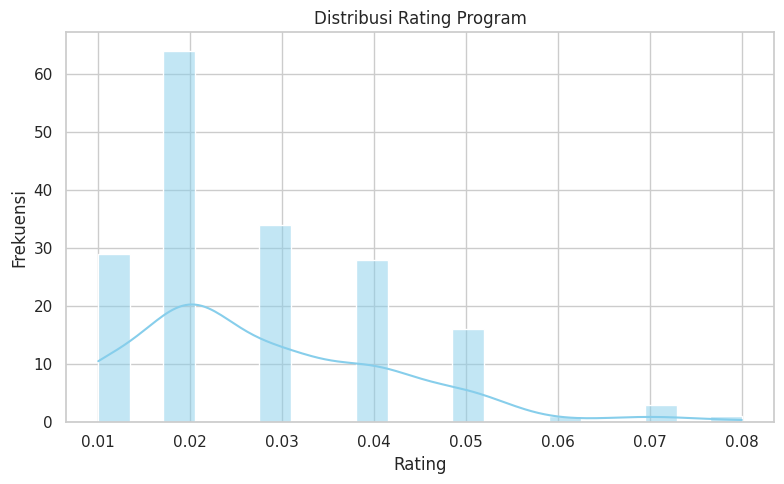

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style visualisasi
sns.set(style='whitegrid')

# Histogram Rating
plt.figure(figsize=(8, 5))
sns.histplot(df['Rating_Program'], bins=20, kde=True, color='skyblue')
plt.title('Distribusi Rating Program')
plt.xlabel('Rating')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

Visualisasi histogram distribusi `Rating_Program` dilakukan untuk memahami **sebaran nilai rating** dalam dataset, yang merupakan langkah penting dalam **Exploratory Data Analysis (EDA)**. Dengan histogram, kita bisa melihat apakah distribusi data bersifat normal, miring, atau mengandung outlier. Berdasarkan grafik yang ditampilkan, distribusi rating cenderung **right-skewed (condong ke kiri)**, dengan mayoritas nilai rating berada di kisaran **0.01 hingga 0.04**, dan hanya sedikit program yang mencapai rating di atas 0.05. Ini menunjukkan bahwa sebagian besar program memiliki rating rendah, dan hanya segelintir yang benar-benar menonjol, sebuah pola umum dalam media massa di mana hanya sedikit program yang mampu menarik perhatian besar secara konsisten. Temuan ini penting karena dapat memengaruhi pemilihan model atau teknik transformasi (misalnya log) untuk prediksi.


## Heatmap Korelasi Keseluruhan

In [21]:
# # Korelasi hanya untuk kolom numerik
# plt.figure(figsize=(14, 10))
# corr_matrix = df.corr(numeric_only=)

# sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
# plt.title('Heatmap Korelasi Antar Variabel Numerik')
# plt.tight_layout()
# plt.show()


In [22]:
# # Korelasi terhadap target (Rating_Program)
# cor_target = corr_matrix['Rating_Program'].sort_values(ascending=False)
# print("Korelasi terhadap Rating_Program:\n", cor_target)


Analisis korelasi terhadap `Rating_Program` dilakukan untuk mengidentifikasi fitur-fitur yang memiliki hubungan linier kuat dengan target, sehingga dapat digunakan secara efektif dalam proses pemodelan. Korelasi membantu menyaring fitur yang **relevan** dan **menghilangkan fitur yang kurang berkontribusi**, guna meningkatkan akurasi model dan mengurangi noise. Berdasarkan hasil, fitur seperti `Share` (0.96) dan `AveTime/Viewer` (0.72) menunjukkan korelasi sangat tinggi dan positif terhadap rating, artinya mereka sangat berpengaruh dalam menentukan performa program. Sebaliknya, fitur seperti `Persentase_Penonton_Laki`, `Total_Rating_Kompetitor`, dan `Persentase_Penonton_Perempuan` memiliki korelasi **sangat lemah (mendekati nol)** atau bahkan negatif terhadap `Rating_Program`. Oleh karena itu, fitur-fitur tersebut **tidak digunakan** dalam pemodelan karena tidak memberikan kontribusi signifikan dan justru bisa meningkatkan kompleksitas tanpa manfaat prediktif yang jelas.


# Pembagian Data

Karena TimeSeriesSplit membagi menjadi fold yang sama besar, kita buat manual split 70/20/10 berdasarkan index tanpa mengacak data:


In [23]:
df.columns

Index(['Durasi_Menit', 'Rating_Program', 'Share', 'Jumlah_Penonton',
       'AveTime/Viewer', 'Persentase_Penonton_Laki',
       'Persentase_Penonton_Perempuan', 'Rating_Kompetitor_Tertinggi',
       'Total_Rating_Kompetitor', 'Year', 'Month', 'Day', 'Tanggal', 'lag_1',
       'lag_2', 'lag_7', 'rolling_3', 'rolling_7', 'std_3', 'std_7'],
      dtype='object')

In [24]:
# ## Versi 1
# selected_features_weekly = [
#     'Durasi_Menit', 'Rating_Program', 'Share', 'Jumlah_Penonton',
#        'AveTime/Viewer', 'Persentase_Penonton_Laki',
#        'Persentase_Penonton_Perempuan', 'Rating_Kompetitor_Tertinggi',
#        'Total_Rating_Kompetitor', 'Year', 'Month', 'Day', 'lag_1',
#        'lag_2', 'lag_7', 'rolling_3', 'rolling_7', 'std_3', 'std_7'
# ]
# Versi 2
selected_features_weekly = [
    'Durasi_Menit', 'Share', 'Jumlah_Penonton',
       'AveTime/Viewer', 'Rating_Kompetitor_Tertinggi', 'Year', 'Month', 'Day', 'lag_1',
       'lag_2', 'lag_7', 'rolling_3', 'rolling_7', 'std_3', 'std_7'
]

# # Versi 3
# selected_features_weekly = [
#     'Durasi_Menit', 'Rating_Program', 'Share', 'Jumlah_Penonton',
#        'AveTime/Viewer', 'Persentase_Penonton_Laki',
#        'Persentase_Penonton_Perempuan', 'Rating_Kompetitor_Tertinggi',
#        'Total_Rating_Kompetitor', 'Year', 'Month', 'Day'
# ]

X = df[selected_features_weekly]
y = df['Rating_Program']

In [25]:
# Hitung index untuk 70% train, 20% validasi, 10% test
n_total = len(df)
n_train = int(n_total * 0.7)
n_val = int(n_total * 0.2)
n_test = n_total - n_train - n_val  # sisa 10%

# Bagi data sesuai time order (tidak diacak)
X_train = X.iloc[:n_train]
y_train = y.iloc[:n_train]

X_val = X.iloc[n_train:n_train+n_val]
y_val = y.iloc[n_train:n_train+n_val]

X_test = X.iloc[n_train+n_val:]
y_test = y.iloc[n_train+n_val:]

# Cek bentuk masing-masing
print("Ukuran Total:", n_total)
print("Train:", X_train.shape, y_train.shape)
print("Validation:", X_val.shape, y_val.shape)
print("Test:", X_test.shape, y_test.shape)


Ukuran Total: 176
Train: (123, 15) (123,)
Validation: (35, 15) (35,)
Test: (18, 15) (18,)


Jika ingin tetap memakai TimeSeriesSplit dalam train,  bisa kombinasikan begini:

In [26]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)

# Cross-validation hanya dilakukan di data training
for fold, (train_index, val_index) in enumerate(tscv.split(X_train)):
    X_train_cv, X_val_cv = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]

    print(f"\nFold {fold + 1}")
    print(f"Train CV: {X_train_cv.shape}, Val CV: {X_val_cv.shape}")



Fold 1
Train CV: (23, 15), Val CV: (20, 15)

Fold 2
Train CV: (43, 15), Val CV: (20, 15)

Fold 3
Train CV: (63, 15), Val CV: (20, 15)

Fold 4
Train CV: (83, 15), Val CV: (20, 15)

Fold 5
Train CV: (103, 15), Val CV: (20, 15)


### Uji coba Versi 1-2-3

=> Versi 1 semua variabel
📌 Model: XGBoost
R²  : 0.9660
RMSE: 0.0019
MAE : 0.0006
MAPE: 0.01%

📌 Model: RandomForest
R²  : 0.8423
RMSE: 0.0051
MAE : 0.0034
MAPE: 0.11%

📌 Model: SVM
R²  : 0.6624
RMSE: 0.0074
MAE : 0.0059
MAPE: 0.25%

=> Versi 2 Tanpa fitur yg tidak berkorelasi (sekitar 0)
selected_features_weekly = [
    'Durasi_Menit', 'Rating_Program', 'Share', 'Jumlah_Penonton',
       'AveTime/Viewer', 'Rating_Kompetitor_Tertinggi', 'Year', 'Month', 'Day', 'lag_1',
       'lag_2', 'lag_7', 'rolling_3', 'rolling_7', 'std_3', 'std_7'
]
📊 RATA-RATA HASIL TIAP MODEL

📌 Model: XGBoost
R²  : 0.9660
RMSE: 0.0019
MAE : 0.0006
MAPE: 0.01%

📌 Model: RandomForest
R²  : 0.8745
RMSE: 0.0045
MAE : 0.0029
MAPE: 0.10%

📌 Model: SVM
R²  : 0.6479
RMSE: 0.0075
MAE : 0.0061
MAPE: 0.25%

=> Versi 3 tanpa lag dan rolling
📌 Model: XGBoost
R²  : 0.9660
RMSE: 0.0019
MAE : 0.0006
MAPE: 0.01%

📌 Model: RandomForest
R²  : 0.8618
RMSE: 0.0047
MAE : 0.0028
MAPE: 0.09%

📌 Model: SVM
R²  : 0.6869
RMSE: 0.0071
MAE : 0.0057
MAPE: 0.24%

# Modeling Random Forest

## Setup Dasar Evaluasi


In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import numpy as np
import joblib


In [28]:
rf_params = {
    'n_estimators': [100, 200, 300, 400, 500, 700, 1000],
    'max_depth': [None, 5, 10, 15, 20, 25, 30, 40, 50],
    'min_samples_split': [2, 3, 5, 8, 10, 15],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6],
    'max_features': ['auto', 'sqrt', 'log2', 0.3, 0.5, 0.7],
    'bootstrap': [True, False],
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse'],
    'oob_score': [True, False]
}

## Tuning & Evaluasi Multi-Model

- RandomizedSearchCV dipakai untuk efisiensi dibanding GridSearchCV

- TimeSeriesSplit memastikan urutan waktu tetap

- Semua model dievaluasi pada 5-fold time-based CV

- Dapat dibandingkan langsung dari rata-rata skor R², RMSE, MAE, dan MAPE

🔍 Tuning Random Forest... Mohon tunggu 😄
Fitting 5 folds for each of 50 candidates, totalling 250 fits
✅ Best Params Random Forest:
{'oob_score': False, 'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 0.7, 'max_depth': 5, 'criterion': 'squared_error', 'bootstrap': False}

📊 Evaluasi Model Random Forest (5 Fold)


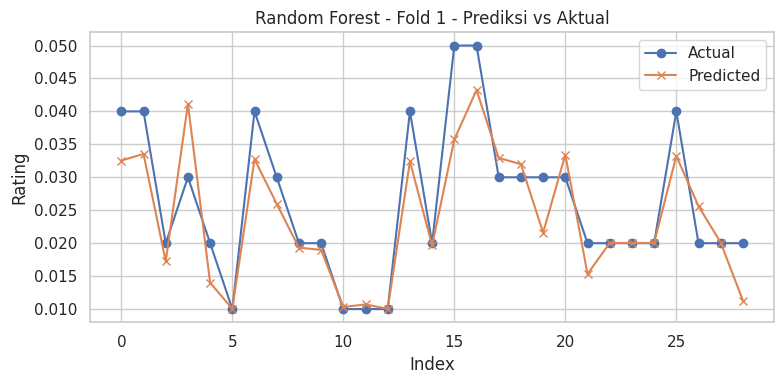

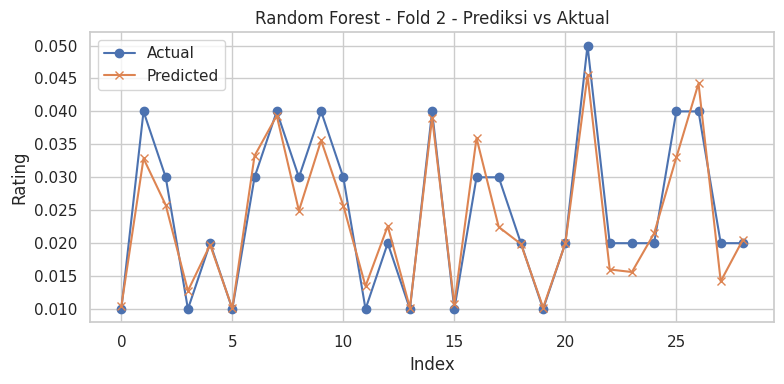

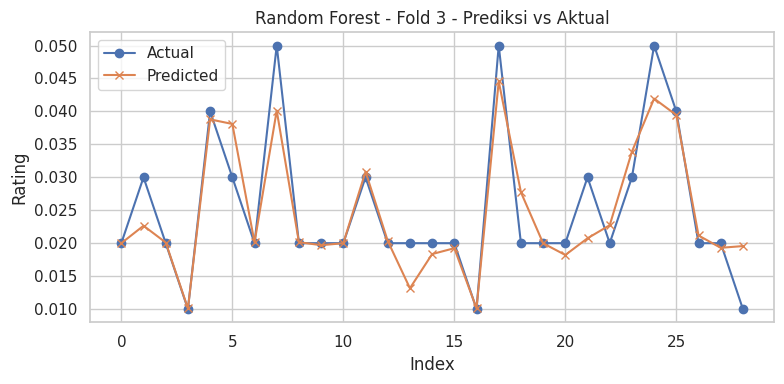

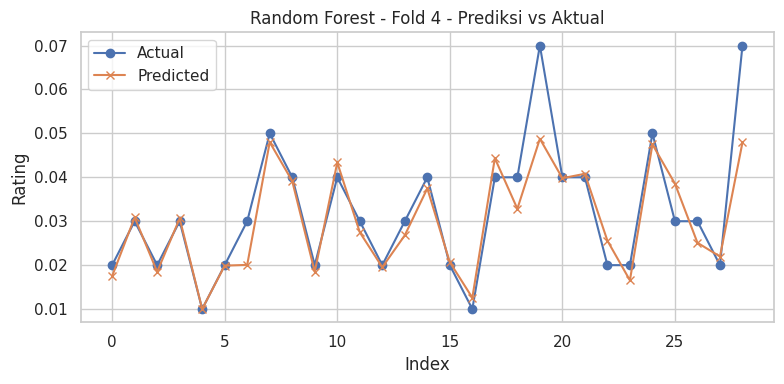

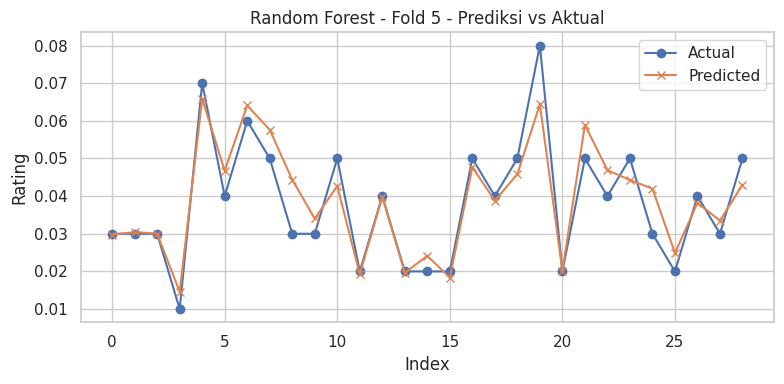

In [29]:
# === 2. TimeSeriesSplit ===
tscv = TimeSeriesSplit(n_splits=5)

# === 3. Tuning ===
rf = RandomForestRegressor(random_state=42)
search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=rf_params,
    n_iter=50,
    cv=tscv,
    scoring=make_scorer(r2_score),
    random_state=42,
    n_jobs=-1,
    verbose=1
)

print("🔍 Tuning Random Forest... Mohon tunggu 😄")
search.fit(X, y)

best_rf = search.best_estimator_
best_params_rf = search.best_params_
print(f"✅ Best Params Random Forest:\n{best_params_rf}")

# === 4. Evaluasi TimeSeriesSplit ===
r2_scores, rmse_scores, mae_scores, mape_scores = [], [], [], []

print("\n📊 Evaluasi Model Random Forest (5 Fold)")
for fold, (train_idx, test_idx) in enumerate(tscv.split(X), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    best_rf.fit(X_train, y_train)
    y_pred = best_rf.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    r2_scores.append(r2)
    rmse_scores.append(rmse)
    mae_scores.append(mae)
    mape_scores.append(mape)

    # Visualisasi
    plt.figure(figsize=(8, 4))
    plt.plot(y_test.values, label='Actual', marker='o')
    plt.plot(y_pred, label='Predicted', marker='x')
    plt.title(f'Random Forest - Fold {fold} - Prediksi vs Aktual')
    plt.xlabel('Index')
    plt.ylabel('Rating')
    plt.legend()
    plt.tight_layout()
    plt.show()

## Rangkuman Hasil Semua Model

In [30]:
print("\n📈 RATA-RATA PERFORMA RANDOM FOREST:")
print(f"R2   : {np.mean(r2_scores):.4f}")
print(f"RMSE : {np.mean(rmse_scores):.4f}")
print(f"MAE  : {np.mean(mae_scores):.4f}")
print(f"MAPE : {np.mean(mape_scores):.2f}%")


📈 RATA-RATA PERFORMA RANDOM FOREST:
R2   : 0.8214
RMSE : 0.0054
MAE  : 0.0038
MAPE : 0.13%


In [31]:
print("Tipe model:", type(best_rf))

Tipe model: <class 'sklearn.ensemble._forest.RandomForestRegressor'>


## Simpan Model

In [32]:
import joblib
joblib.dump(best_rf, "random_forest_final_model_v4.pkl")
print("\n💾 Model Random Forest disimpan sebagai random_forest_final_model_v4.pkl ✅")


💾 Model Random Forest disimpan sebagai random_forest_final_model_v4.pkl ✅


In [33]:
# import pickle
# # Simpan model
# with open("model_laporan8pagi.pkl", "wb") as f_model:
#     pickle.dump(best_rf, f_model)

In [34]:
# # Simpan scaler
# with open("scaler_laporan8pagi.pkl", "wb") as f_scaler:
#     pickle.dump(scaler, f_scaler)


# Tanpa Tuning

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import joblib
import numpy as np

# Train tanpa tuning
rf_notuned = RandomForestRegressor(random_state=42)
# svm_notuned = SVR()
# xgb_notuned = XGBRegressor(n_estimators=100, verbosity=0, random_state=42)  # disarankan untuk set verbosity=0 agar tidak spam log

rf_notuned.fit(X_train, y_train)
# svm_notuned.fit(X_train, y_train)
# xgb_notuned.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [36]:
# Prediksi
rf_pred = rf_notuned.predict(X_test)
# svm_pred = svm_notuned.predict(X_test)
# xgb_pred = xgb_notuned.predict(X_test)

In [37]:
# Evaluasi
def evaluate(y_true, y_pred):
    return {
        "R2": r2_score(y_true, y_pred),
        "RMSE": mean_squared_error(y_true, y_pred, squared=False),
        "MAE": mean_absolute_error(y_true, y_pred),
        "MAPE": np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    }

results_notuned = pd.DataFrame([
    {"Model": "Random Forest (no tuning)", **evaluate(y_test, rf_pred)},
    # {"Model": "SVM (no tuning)", **evaluate(y_test, svm_pred)},
    # {"Model": "XGBoost (no tuning)", **evaluate(y_test, xgb_pred)},
])

# Simpan model tanpa tuning
joblib.dump(rf_notuned, "rf_model_notuned.pkl")
# joblib.dump(svm_notuned, "svm_model_notuned.pkl")
# joblib.dump(xgb_notuned, "xgb_model_notuned.pkl")

# Tampilkan hasil
print("\n📊 Evaluasi Model Tanpa Tuning:")
print(results_notuned.round(4))

TypeError: got an unexpected keyword argument 'squared'

## Uji coba prediksi model dengan manual tanpa dashboard

In [ ]:
import pandas as pd
import joblib
import numpy as np

# Load model
model = joblib.load("xgboost_final_model_v3.pkl")

# Buat input data 7 hari ke depan (simulasi variasi data manual)
data_prediksi = {
    'Durasi_Menit': [60, 62, 58, 61, 63, 59, 60],
    'Share': [0.10, 0.12, 0.11, 0.09, 0.13, 0.11, 0.10],
    'Jumlah_Penonton': [30000, 32000, 29000, 31000, 33000, 30000, 31000],
    'AveTime/Viewer': [7.5, 8, 7.2, 7.8, 8.2, 7.9, 7.6],
    'Rating_Kompetitor_Tertinggi': [1.2, 1.3, 1.25, 1.1, 1.35, 1.3, 1.2],
    'Year': [2025]*7,
    'Month': [9]*7,
    'Day': [4, 5, 6, 7, 8, 9, 10],
    'lag_1': [0.03, 0.031, 0.032, 0.0315, 0.032, 0.0317, 0.0318],
    'lag_2': [0.029, 0.03, 0.031, 0.032, 0.0315, 0.032, 0.0317],
    'lag_7': [0.028, 0.029, 0.03, 0.031, 0.031, 0.0305, 0.031],
    'rolling_3': [0.030, 0.031, 0.0315, 0.0312, 0.0314, 0.0315, 0.0313],
    'rolling_7': [0.031, 0.0311, 0.0312, 0.0313, 0.0314, 0.0315, 0.0316],
    'std_3': [0.001, 0.0012, 0.0011, 0.0009, 0.001, 0.0011, 0.001],
    'std_7': [0.0012, 0.0013, 0.0014, 0.0015, 0.0012, 0.0013, 0.0014]
}

df_input = pd.DataFrame(data_prediksi)

# Lakukan prediksi
rating_pred = model.predict(df_input)

# Buat hasil akhir
df_input["Tanggal"] = pd.date_range(start="2025-09-04", periods=7, freq='D')
df_input["Hari"] = df_input["Tanggal"].dt.day_name()
df_input["Rating_Prediksi"] = rating_pred

# Tampilkan hasil
df_hasil = df_input[["Tanggal", "Hari", "Rating_Prediksi"]]
print(df_hasil)


In [ ]:
import pandas as pd
import numpy as np
import pickle
from datetime import timedelta

# === STEP 1: Load Model ===
# with open("model_laporan8pagi.pkl", "rb") as f_model:
#     model = pickle.load(f_model)

import joblib
model = joblib.load("xgboost_final_model_v3.pkl")

In [ ]:
# === STEP 2: Load Data ===
df = pd.read_excel("file aktual 1 - 7 maret full - Copy.xlsx")
df.head(10)

In [ ]:
# === STEP 3: Siapkan Kolom Tanggal ===
df["Tanggal_Program"] = pd.to_datetime(df["Tanggal_Program"])
df = df.sort_values("Tanggal_Program").reset_index(drop=True)

# === STEP 4: Tambahkan Fitur Tanggal ===
df["Year"] = df["Tanggal_Program"].dt.year
df["Month"] = df["Tanggal_Program"].dt.month
df["Day"] = df["Tanggal_Program"].dt.day

# === STEP 5: Buat Fitur Statistik Tambahan ===
df["lag_1"] = df["Rating_Program"].shift(1)
df["lag_2"] = df["Rating_Program"].shift(2)
df["lag_7"] = df["Rating_Program"].shift(7)
df["rolling_3"] = df["Rating_Program"].rolling(3).mean().shift(1)
df["rolling_7"] = df["Rating_Program"].rolling(7).mean().shift(1)
df["std_3"] = df["Rating_Program"].rolling(3).std().shift(1)
df["std_7"] = df["Rating_Program"].rolling(7).std().shift(1)

In [ ]:
# === STEP 6: Siapkan Urutan Fitur ===
feature_order = [
    'Durasi_Menit', 'Share', 'Jumlah_Penonton', 'AveTime/Viewer',
    'Rating_Kompetitor_Tertinggi', 'Year', 'Month', 'Day',
    'lag_1', 'lag_2', 'lag_7',
    'rolling_3', 'rolling_7', 'std_3', 'std_7'
]

# === STEP 7: Ambil Data Terakhir Sebagai Dasar Prediksi ===
last_row = df.dropna().iloc[-1].copy()  # pastikan data lengkap

In [ ]:
# # Buat DataFrame dan isi NaN dengan 0
# input_df = pd.DataFrame([new_row])[feature_order].fillna(0)

# # Prediksi rating
# input_df = input_df.drop(columns=["Rating_Program"], errors="ignore")

In [ ]:
# expected_features = [
#     "Durasi_Menit", "Share", "Jumlah_Penonton", "AveTime/Viewer",
#     "Rating_Kompetitor_Tertinggi", "Year", "Month", "Day",
#     "lag_1", "lag_2", "lag_7", "rolling_3", "rolling_7", "std_3", "std_7"
# ]
# input_df = input_df[expected_features]
# print(input_df)

In [ ]:
# print(input_df.columns.tolist())

In [ ]:
# === STEP 8: Prediksi 7 Hari ke Depan ===
results = []

for i in range(1, 8):
    next_date = last_row["Tanggal_Program"] + timedelta(days=1)

    # Fitur tanggal
    year, month, day = next_date.year, next_date.month, next_date.day

    # Buat data baru
    new_row = {
        'Durasi_Menit': last_row['Durasi_Menit'],
        'Share': last_row['Share'],
        'Jumlah_Penonton': last_row['Jumlah_Penonton'],
        'AveTime/Viewer': last_row['AveTime/Viewer'],
        'Rating_Kompetitor_Tertinggi': last_row['Rating_Kompetitor_Tertinggi'],
        'Year': year, 'Month': month, 'Day': day,
        'lag_1': last_row['Rating_Program'],
        'lag_2': last_row['lag_1'],
        'lag_7': last_row['lag_6'] if 'lag_6' in last_row else last_row['lag_2'],  # fallback
        'rolling_3': last_row['rolling_3'],
        'rolling_7': last_row['rolling_7'],
        'std_3': last_row['std_3'],
        'std_7': last_row['std_7']
    }

    # Buat DataFrame dan isi NaN dengan 0
    input_df = pd.DataFrame([new_row])[feature_order].fillna(0)


    # Prediksi rating
    # rating_pred = model.predict(input_df)[0]
    # rating_pred = max(0.1, min(20.0, rating_pred))  # clamp rating
    raw_pred = model.predict(input_df)[0]
    print("Raw prediction:", raw_pred)
    rating_pred = raw_pred


    # Simpan hasil
    results.append({
        "Tanggal": next_date,
        "Rating_Prediksi": rating_pred,
        "Hari": next_date.strftime("%A")
    })

    # Update last_row untuk prediksi hari berikutnya
    last_row["Tanggal_Program"] = next_date
    last_row["lag_2"] = last_row["lag_1"]
    last_row["lag_1"] = rating_pred
    last_row["rolling_3"] = np.mean([last_row["rolling_3"], rating_pred])
    last_row["rolling_7"] = np.mean([last_row["rolling_7"], rating_pred])
    last_row["std_3"] = 0  # dummy (karena std tidak bisa diperbarui akurat)
    last_row["std_7"] = 0
    last_row["Rating_Program"] = rating_pred

In [ ]:
print("Input ke model untuk prediksi hari ke-", i)
print(input_df)

In [ ]:
type(model)


In [ ]:
# === STEP 9: Tampilkan Hasil ===
df_pred = pd.DataFrame(results)
print(df_pred)

In [ ]:
import matplotlib.pyplot as plt

df_pred["Rating_Program_Realistic"] = df_pred["Rating_Prediksi"]
plt.plot(df_pred["Tanggal"], df_pred["Rating_Program_Realistic"], marker='o')
plt.title("Prediksi Rating 7 Hari ke Depan")
plt.xticks(rotation=45)
plt.ylabel("Rating Program")
plt.grid()
plt.show()

In [ ]:
# Augmentasi dengan jittering
X_train_aug = X_train.copy()
y_train_aug = y_train.copy()

for i in range(3):  # gandakan 3x
    noise_X = X_train + np.random.normal(0, 0.01, X_train.shape)
    noise_y = y_train + np.random.normal(0, 0.01, y_train.shape)
    X_train_aug = pd.concat([X_train_aug, pd.DataFrame(noise_X, columns=X_train.columns)])
    y_train_aug = pd.concat([y_train_aug, pd.Series(noise_y)])

print("Jumlah data sebelum augmentasi:", X_train.shape, y_train.shape)
print("Jumlah data sesudah augmentasi:", X_train_aug.shape, y_train_aug.shape)

# Latih ulang Random Forest dengan data augmented
rf_aug = RandomForestRegressor(random_state=42)
rf_aug.fit(X_train_aug, y_train_aug)
y_pred_aug = rf_aug.predict(X_test)

print("📊 Evaluasi Random Forest dengan data augmented:")
print(evaluate(y_test, y_pred_aug))


In [ ]:
importances = best_rf.feature_importances_
feat_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=feat_importances, y=feat_importances.index)
plt.title("Feature Importance - Random Forest")
plt.show()
